# Challenge Set 6 Classification Error Metrics¶

Topic: Classification Error Metrics

Date: 02/04/2016

Name: Kenneth Myers

Worked with: NA

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

%matplotlib inline


/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [2]:
def read_data(filename):
    with open(filename) as f:
        data = pd.read_csv(f)
        
    return data

In [3]:
congressional_data = read_data('../../05-classification/ken_m/house-votes-84.csv')

In [4]:
vote_cols = [str(i) for i in range(1,17)]

In [5]:
congressional_data[congressional_data == 'y'] = 1
congressional_data[congressional_data == 'n'] = 0
for i in vote_cols:
    congressional_data[i][congressional_data[i] == '?'] = congressional_data[i].value_counts()[1]/\
                                                (congressional_data[i].value_counts()[1]+\
                                                 congressional_data[i].value_counts()[0])

In [6]:
X = congressional_data[vote_cols]
y = congressional_data.Party

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=4444)


In [7]:
def getScoreValues(X_train, X_test, y_train, y_test, model=KNeighborsClassifier(n_neighbors=6)):
    if model == 'democrats':
        y_pred = ['democrat' for _ in range(len(y_test))]
        
    elif model == 'republicans':
        y_pred = ['republican' for _ in range(len(y_test))]
    
    else:
        model = model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    accuracy_score_value = accuracy_score(y_test, y_pred)
    precision_score_value = precision_score(y_test, y_pred, pos_label='democrat')
    recall_score_value = recall_score(y_test, y_pred, pos_label='democrat')
    f1_score_value = f1_score(y_test, y_pred, pos_label='democrat')
                   
    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nf1: {}'.format(accuracy_score_value, \
                                                                   precision_score_value, \
                                                                   recall_score_value, \
                                                                   f1_score_value))

The instructions didn't say cross-validation was necessary so I did not cross-validate, though this can be done with:
    
    cross_val_score(method, X, y, scoring='precision')

#### KNN regression

In [8]:
getScoreValues(X_train, X_test, y_train, y_test)


Accuracy: 0.9312977099236641
Precision: 0.925
Recall: 0.961038961038961
f1: 0.9426751592356688


#### Logistic Regression

In [9]:
getScoreValues(X_train, X_test, y_train, y_test, model=LogisticRegression())

Accuracy: 0.9389312977099237
Precision: 0.9259259259259259
Recall: 0.974025974025974
f1: 0.949367088607595


#### Predict Democrats Only

In [10]:
getScoreValues(X_train, X_test, y_train, y_test, model='democrats')

Accuracy: 0.5877862595419847
Precision: 0.5877862595419847
Recall: 1.0
f1: 0.7403846153846154


#### Predict Republicans Only

In [11]:
getScoreValues(X_train, X_test, y_train, y_test, model='republicans')

Accuracy: 0.4122137404580153
Precision: 0.0
Recall: 0.0
f1: 0.0


/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Gaussian NB

In [12]:
getScoreValues(X_train, X_test, y_train, y_test, model=GaussianNB())

Accuracy: 0.9389312977099237
Precision: 0.9156626506024096
Recall: 0.987012987012987
f1: 0.95


#### SVC

In [13]:
getScoreValues(X_train, X_test, y_train, y_test, model=SVC())

Accuracy: 0.9541984732824428
Precision: 0.9493670886075949
Recall: 0.974025974025974
f1: 0.9615384615384615


#### Decision Tree Classifier

In [14]:
getScoreValues(X_train, X_test, y_train, y_test, model=DecisionTreeClassifier())

Accuracy: 0.9389312977099237
Precision: 0.9367088607594937
Recall: 0.961038961038961
f1: 0.9487179487179488


#### Random Forest Classifier

In [15]:
getScoreValues(X_train, X_test, y_train, y_test, model=RandomForestClassifier())

Accuracy: 0.9618320610687023
Precision: 0.95
Recall: 0.987012987012987
f1: 0.9681528662420381


## Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [16]:
def getROCcurve(X_train, X_test, y_train, y_test, model=KNeighborsClassifier(n_neighbors=6)):
    model = model
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    auc = roc_auc_score(y_test, y_scores)
    print('AUC: {}'.format(auc))
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(12, 8, forward=True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='best')

In [17]:
y_test2 = deepcopy(y_test)
y_test2[y_test2 == 'democrat'] = int(0)
y_test2[y_test2 == 'republican'] = int(1)
y_test2 = list(y_test2)

#### KNN regression

AUC: 0.9484126984126985


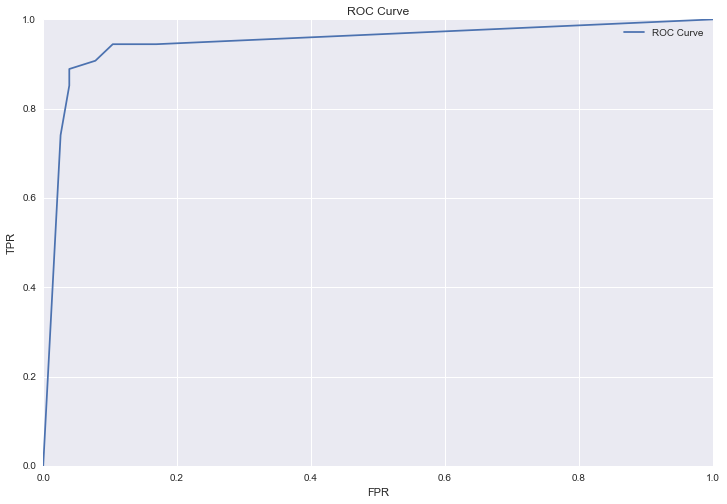

In [18]:
getROCcurve(X_train, X_test, y_train, y_test2, model=KNeighborsClassifier(n_neighbors=6))

#### Logistic Regression

AUC: 0.9877344877344877


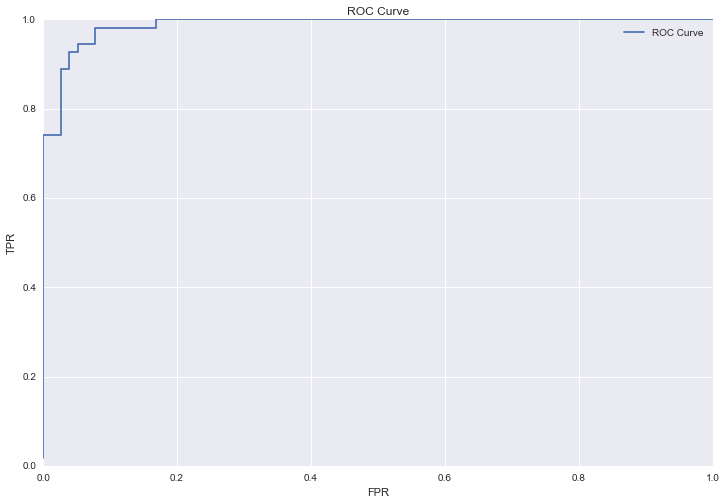

In [19]:
getROCcurve(X_train, X_test, y_train, y_test2, model=LogisticRegression())

#### Gaussian NB

AUC: 0.9510582010582012


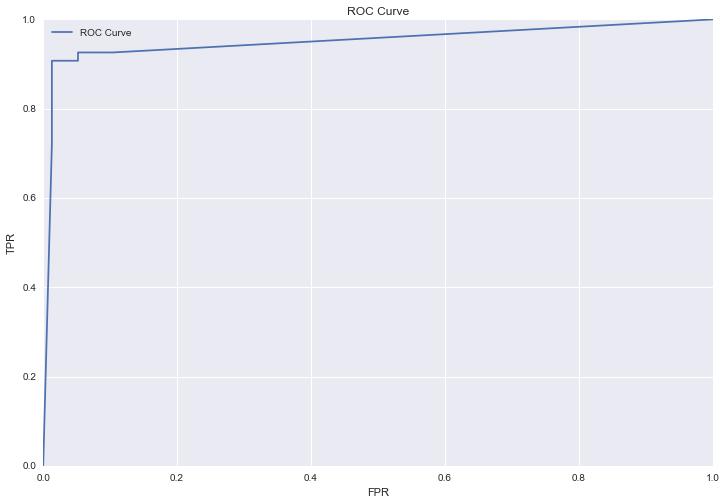

In [20]:
getROCcurve(X_train, X_test, y_train, y_test2, model=GaussianNB())

#### SVC

AUC: 0.994949494949495


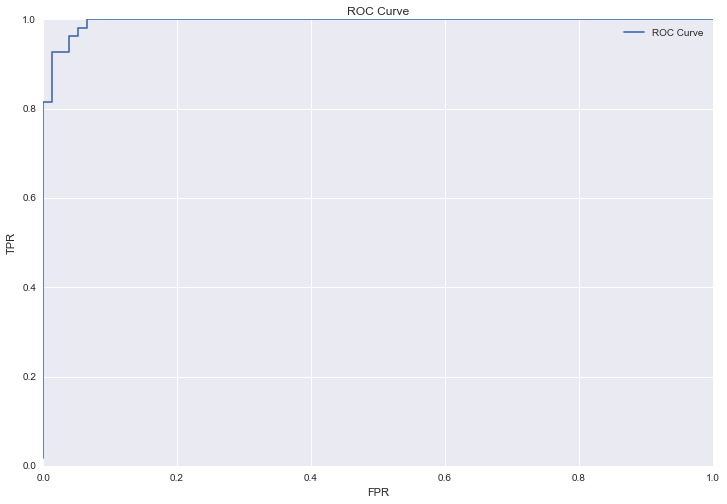

In [21]:
getROCcurve(X_train, X_test, y_train, y_test2, model=SVC(probability=True))

#### Decision Tree Classifier

AUC: 0.9407166907166907


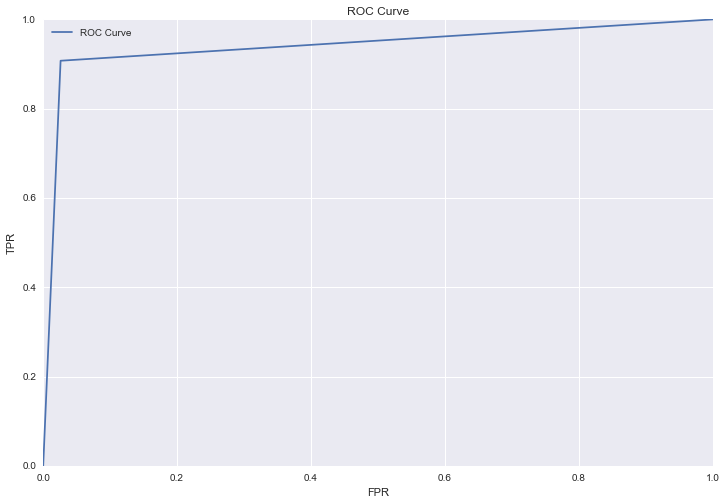

In [22]:
getROCcurve(X_train, X_test, y_train, y_test2, model=DecisionTreeClassifier())

#### Random Forest Classifier

AUC: 0.9914622414622414


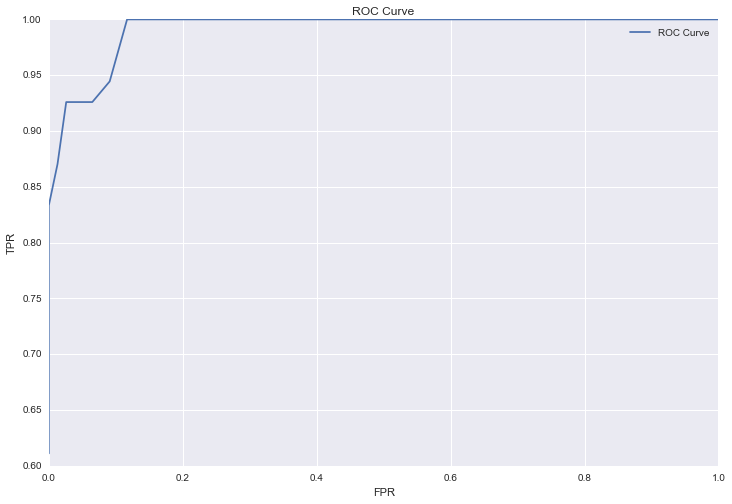

In [23]:
getROCcurve(X_train, X_test, y_train, y_test2, model=RandomForestClassifier())

## Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

And now I feel dumb for writing out the sentence above. -Ken

In [24]:
def getScoreValuesByCV(X, y, model=KNeighborsClassifier(n_neighbors=6)):
    y_2 = deepcopy(y)
    y_2[y_2 == 'democrat'] = int(1)
    y_2[y_2 == 'republican'] = int(0)
    y_2 = list(y_2)
    
    accuracy_score_value = np.mean(cross_val_score(model, X, y_2, scoring='accuracy', cv=10))
    precision_score_value = np.mean(cross_val_score(model, X, y_2, scoring='precision', cv=10))
    recall_score_value = np.mean(cross_val_score(model, X, y_2, scoring='recall', cv=10))
    f1_score_value = np.mean(cross_val_score(model, X, y_2, scoring='f1', cv=10))
                   
    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nf1: {}'.format(accuracy_score_value, \
                                                                   precision_score_value, \
                                                                   recall_score_value, \
                                                                   f1_score_value))

#### KNN regression

In [25]:
getScoreValuesByCV(X, y)

Accuracy: 0.9191029900332227
Precision: 0.9659840287426494
Recall: 0.9022792022792021
f1: 0.9300782410162572


#### Logistic Regression

In [26]:
getScoreValuesByCV(X, y, model=LogisticRegression())

Accuracy: 0.9582276250880902
Precision: 0.9668315018315019
Recall: 0.9658119658119659
f1: 0.9657463704976994


#### Gaussian NB

In [27]:
getScoreValuesByCV(X, y, model=GaussianNB())

Accuracy: 0.9397739857042182
Precision: 0.9512088964675172
Recall: 0.9509971509971511
f1: 0.9505738943097434


#### SVC

In [28]:
getScoreValuesByCV(X, y, model=SVC())

Accuracy: 0.9582804792107119
Precision: 0.9776921354507563
Recall: 0.9545584045584047
f1: 0.9651834301473592


#### Decision Tree Classifier

In [29]:
getScoreValuesByCV(X, y, model=DecisionTreeClassifier())

Accuracy: 0.9330690627202255
Precision: 0.9561474043198182
Recall: 0.9433048433048434
f1: 0.9504999110747695


#### Random Forest Classifier

In [30]:
getScoreValuesByCV(X, y, model=RandomForestClassifier())

Accuracy: 0.9513565891472868
Precision: 0.978081098339719
Recall: 0.9433048433048434
f1: 0.9594572879950238


## Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [31]:
movie_data = read_data('../../05-classification/ken_m/2015_movies.csv')
movie_data = movie_data.drop('Unnamed: 0', axis=1)
movie_data = movie_data.dropna()
rating_dummies = pd.get_dummies(movie_data['Rating'])
rating_names = list(rating_dummies.columns)

In [32]:
def getScoreValues2(local_X, local_y, model=KNeighborsClassifier(n_neighbors=6)):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(local_X, local_y, test_size = .30, random_state=4444)
    
    for col in local_y.columns:
        model = model
        model.fit(X_train3, y_train3[col])
        y_pred = model.predict(X_test3)

        precision_score_value = precision_score(y_test3[col], y_pred)
        recall_score_value = recall_score(y_test3[col], y_pred)

        print('{}:\nPrecision: {}\nRecall: {}\n'.format(col,\
                                                              precision_score_value, \
                                                              recall_score_value))

#### KNN regression

In [33]:
getScoreValues2(movie_data[['Budget', 'DomesticTotalGross', 'Runtime']], rating_dummies)

PG:
Precision: 0.0
Recall: 0.0

PG-13:
Precision: 0.3333333333333333
Recall: 0.25

R:
Precision: 1.0
Recall: 0.3333333333333333



/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression

In [34]:
getScoreValues2(movie_data[['Budget', 'DomesticTotalGross', 'Runtime']], rating_dummies, model=LogisticRegression())

PG:
Precision: 0.0
Recall: 0.0

PG-13:
Precision: 0.5
Recall: 1.0

R:
Precision: 0.0
Recall: 0.0



/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Gaussian NB

In [35]:
getScoreValues2(movie_data[['Budget', 'DomesticTotalGross', 'Runtime']], rating_dummies, model=GaussianNB())

PG:
Precision: 0.0
Recall: 0.0

PG-13:
Precision: 0.5
Recall: 0.16666666666666666

R:
Precision: 0.4375
Recall: 0.7777777777777778



/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SVC

In [36]:
getScoreValues2(movie_data[['Budget', 'DomesticTotalGross', 'Runtime']], rating_dummies, model=SVC())

PG:
Precision: 0.0
Recall: 0.0

PG-13:
Precision: 0.5
Recall: 1.0

R:
Precision: 0.0
Recall: 0.0



/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Decision Tree Classifier

In [37]:
getScoreValues2(movie_data[['Budget', 'DomesticTotalGross', 'Runtime']], rating_dummies, model=DecisionTreeClassifier())

PG:
Precision: 0.4
Recall: 0.6666666666666666

PG-13:
Precision: 0.4
Recall: 0.16666666666666666

R:
Precision: 0.6
Recall: 0.6666666666666666



#### Random Forest Classifier

In [38]:
getScoreValues2(movie_data[['Budget', 'DomesticTotalGross', 'Runtime']], rating_dummies, model=RandomForestClassifier())

PG:
Precision: 0.6666666666666666
Recall: 0.6666666666666666

PG-13:
Precision: 0.4444444444444444
Recall: 0.3333333333333333

R:
Precision: 0.8
Recall: 0.4444444444444444



## Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [39]:
cancer_data = read_data('../../05-classification/ken_m/haberman.csv')
X = cancer_data[['Age', 'Year', 'NodesDetected']]
y = cancer_data.SurvivalStatus
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


In [40]:
cancer_data.head()

,Age,Year,NodesDetected,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [41]:
y_test2 = deepcopy(y_test)
y_test2[y_test2 == 1] = int(0)
y_test2[y_test2 == 2] = int(1)
y_test2 = list(y_test2)

AUC: 0.6475225225225225


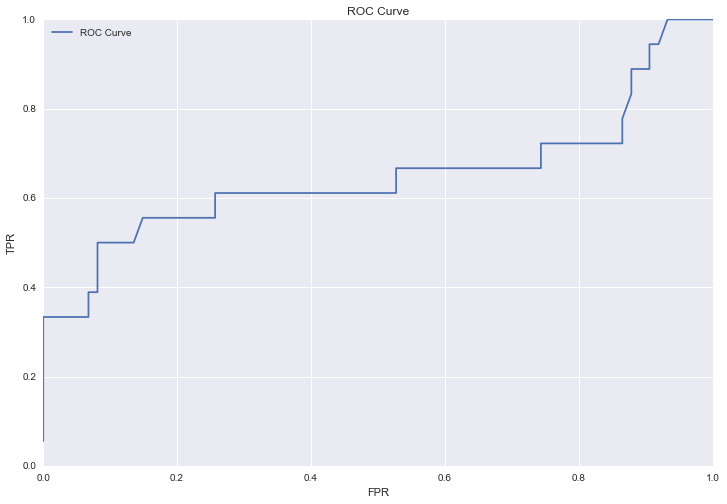

In [42]:
getROCcurve(X_train, X_test, y_train, y_test2, model=LogisticRegression())